# Simulating the average cost

In [ ]:
import numpy as np

# consider all possible initial states
running_costs = np.zeros((20,20))

current_state = np.zeros((20,20,2))

# initialize the current state

for i in range(1,21):
    for j in range(1,21):
        current_state[i-1,j-1] = [i,j]

n_timesteps = 10000

# create a matrix to store the random values for the simulation

random_values = np.random.rand(20,20,2,n_timesteps)

In [5]:
(current_state[:,:,0] == 1).shape

(20, 20)

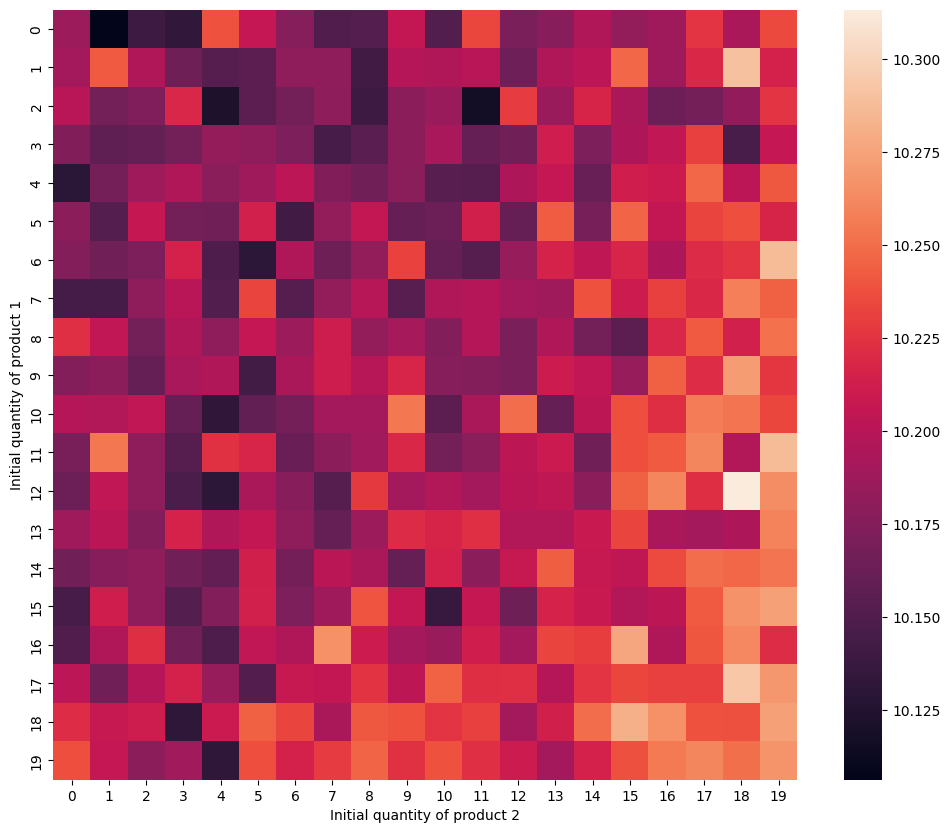

In [ ]:


for t in range(n_timesteps):

    # simulate the holding costs
    # the holding costs are 1 for the first product and 2 for the second product

    running_costs += current_state[:,:,0] + 2*current_state[:,:,1] 

    ## all the elements in the current state that are 1 should be ordered so that the inventory level of both products becomes 5

    running_costs[(current_state[:,:,0] == 1) | (current_state[:,:,1] == 1)] += 5


    current_state[current_state == 1] = 5

    ## simulate the demand for the products

    current_state[:,:,:] -= (random_values[:,:,:,t] < 0.5).astype(int)



# calculate the average costs

average_costs = running_costs / n_timesteps


# plot the average costs matrix to see the costs for each initial state using seaborn's heatmap

import seaborn as sns


import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

sns.heatmap(average_costs)

plt.xlabel("Initial quantity of product 2")

plt.ylabel("Initial quantity of product 1")


plt.show()

# Plotting cost Matrix

In [5]:
MAX_ITEMS = 20
import numpy as np

H = np.array([1, 2])  # Holding costs for each item type
K = 5  # Order costs



costs = np.zeros((MAX_ITEMS, MAX_ITEMS))
for i in range(0, MAX_ITEMS):
    for j in range(0, MAX_ITEMS):
        state = np.array([i, j]) + 1 
        costs[i, j] = H @ state + 5 * (1 if np.any(state == 1) else 0)

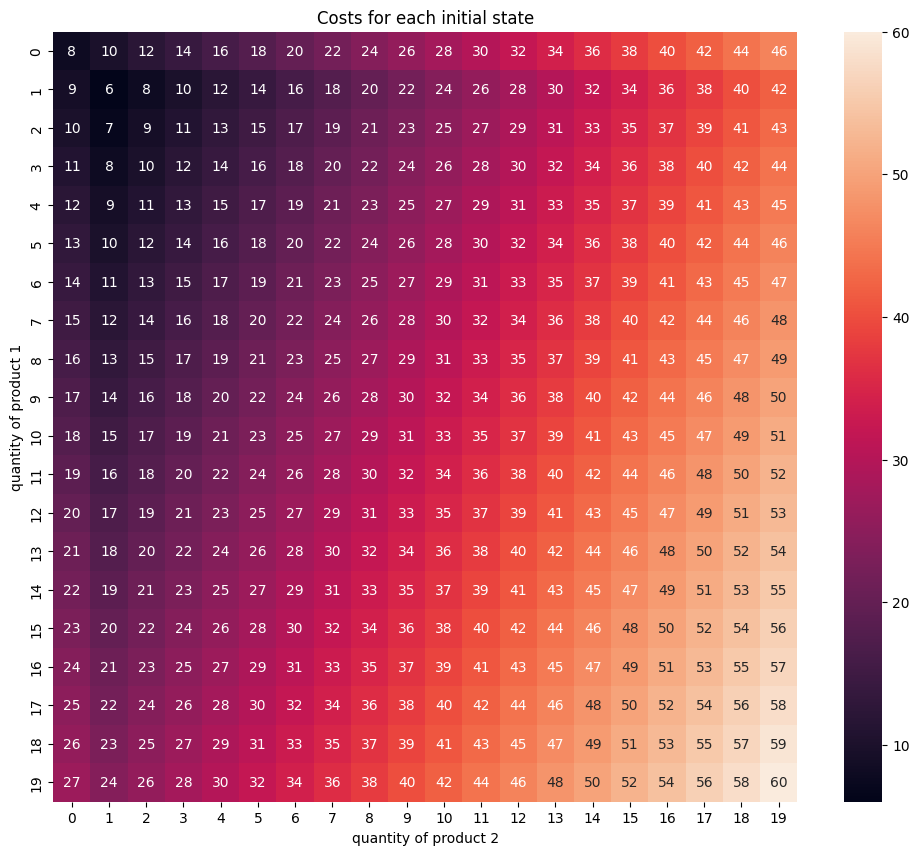

In [6]:
# plot costs big with seaborn's heatmap and annotation of values

import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

sns.heatmap(costs.ravel().reshape((20,20), order='C'), annot=True)

plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

plt.title("Costs for each initial state")


plt.show()







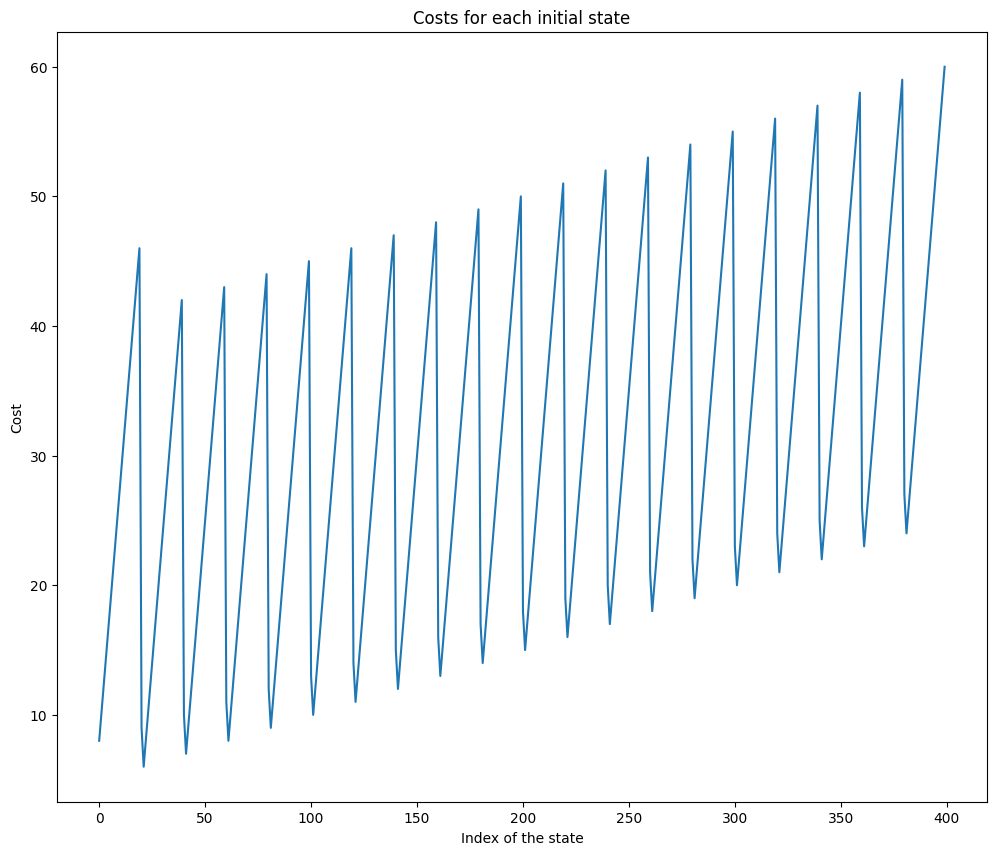

In [ ]:
# plot the ravel of the costs matrix

plt.figure(figsize=(12,10))

plt.plot(costs.ravel())

plt.xlabel("Index of the state")

plt.ylabel("Cost")

plt.title("Costs for each initial state")

plt.show()


# Bellman value iteration

In [2]:
from main import question_f

In [3]:
v, phi, policy = question_f(n= 1000)

Value iteration: 100%|██████████| 1000/1000 [01:44<00:00,  9.60it/s]


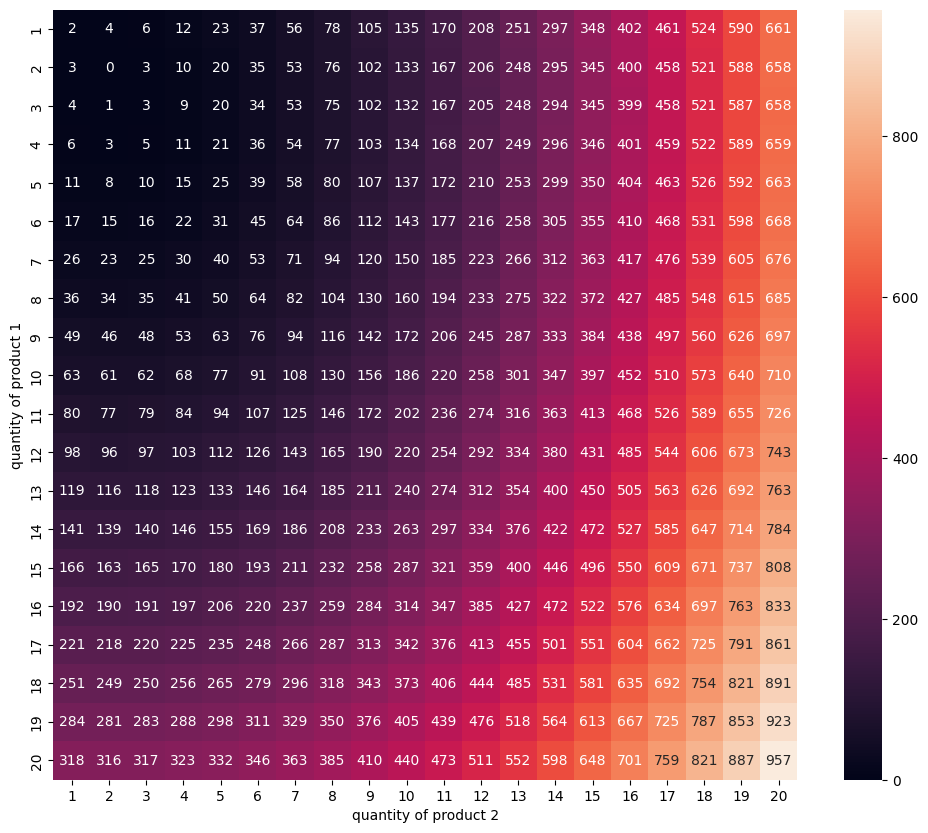

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

policy2d = policy.reshape(20,20,2)

v2d = v.reshape((20,20), order= "C")

phi2d = phi.reshape((20,20), order= "C")


plt.figure(figsize=(12,10))

# annotate with natural numbers 
sns.heatmap(v2d, annot = True, fmt = ".0f")

# change the labels to start from 1 and move the ticks to the center of the cells

plt.xticks(np.arange(20) + 0.5, np.arange(1,21))

plt.yticks(np.arange(20) + 0.5, np.arange(1,21))



plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

#plt.title("Value function")

plt.show()




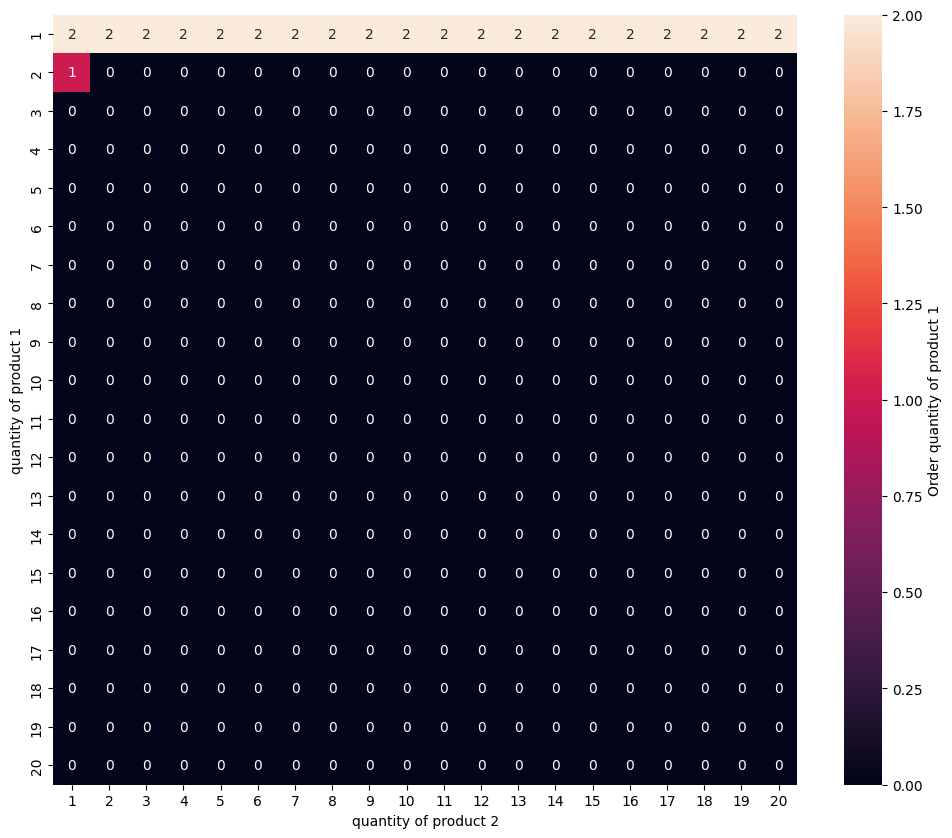

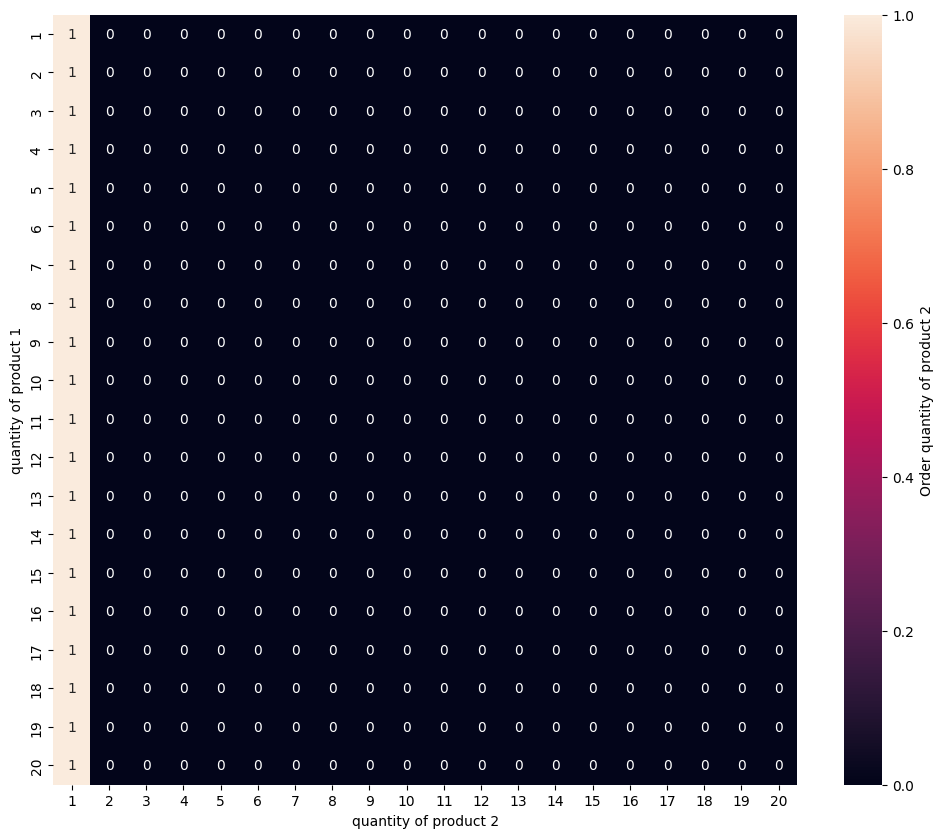

In [4]:
# plot the policy2d matrix 

plt.figure(figsize=(12,10))


sns.heatmap(policy[:,0].reshape((20,20), order='C'), annot = True, fmt = ".0f", cbar_kws={'label': 'Order quantity of product 1'})

# fix the labels

plt.xticks(np.arange(20) + 0.5, np.arange(1,21))

plt.yticks(np.arange(20) + 0.5, np.arange(1,21))



plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

#plt.title("Optimal policy for product 1")

plt.show()

plt.figure(figsize=(12,10))

sns.heatmap(policy[:,1].reshape((20,20), order='C'), annot = True, fmt = ".0f", cbar_kws={'label': 'Order quantity of product 2'})

plt.xticks(np.arange(20) + 0.5, np.arange(1,21))

plt.yticks(np.arange(20) + 0.5, np.arange(1,21))
plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

#plt.title("Optimal policy for product 2")

plt.show()


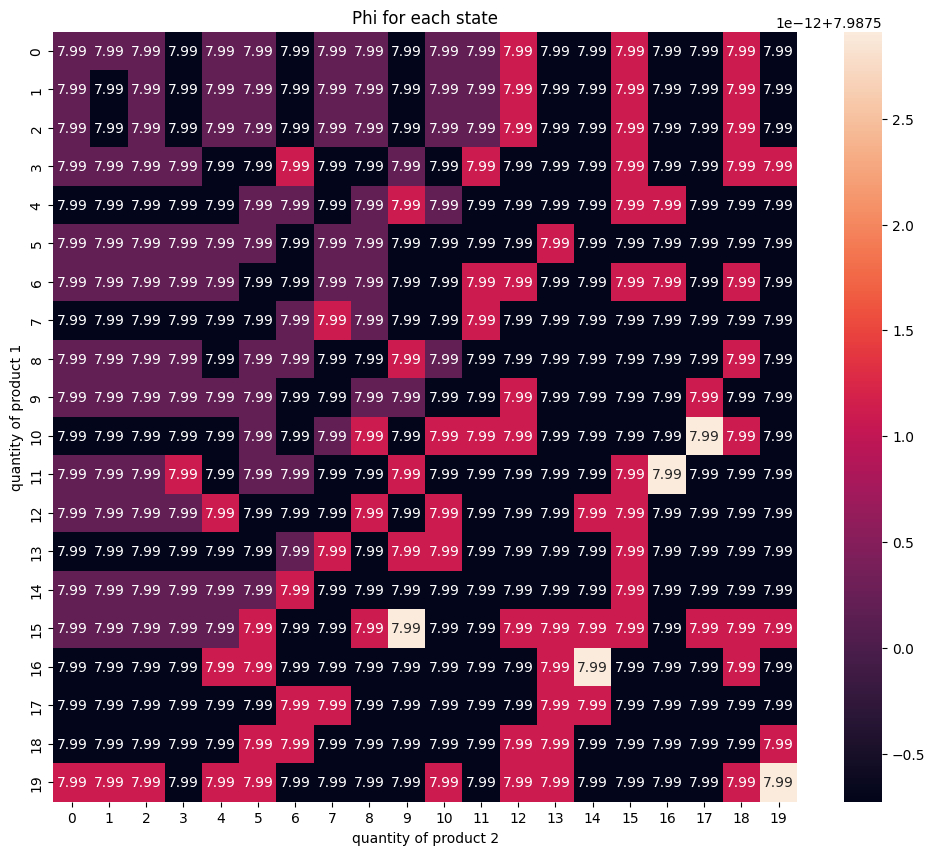

In [11]:
# plot costs big with seaborn's heatmap and annotation of values

import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

sns.heatmap(phi2d, annot=True, fmt = ".2f")

plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

plt.title("Phi for each state")


plt.show()
